# Planes vs. Background Prediction Problem
## Categorical Classification
* https://www.tensorflow.org/tutorials/images/cnn
* https://www.tensorflow.org/tutorials/images/classification

In [1]:
from os import path, listdir

import numpy as np

import tensorflow as tf

from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

from matplotlib import pyplot
from matplotlib.image import imread

## Dataset

In [2]:
# define location of dataset
folder = './Images/'
img_height = 32
img_width = 32
batch_size = 1

In [3]:
datagen = ImageDataGenerator(rescale=1.0/255.0, validation_split=0.2)

In [4]:
train_it = datagen.flow_from_directory(folder,
                                       subset="training", 
                                       seed=123,
                                       class_mode='categorical',
                                       batch_size=batch_size,
                                       target_size=(img_height, img_width))

Found 3410 images belonging to 2 classes.


In [5]:
val_it = datagen.flow_from_directory(folder,
                                     subset="validation", 
                                     seed=123,
                                     class_mode='categorical',
                                     batch_size=batch_size, 
                                     target_size=(img_height, img_width))

Found 852 images belonging to 2 classes.


## Base Model

In [6]:
model = models.Sequential([
    layers.Input(shape=(img_height,img_width,3)),
    layers.Conv2D(32, (3,3), padding = "same",
                  activation = tf.keras.activations.relu),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(16, (3,3), padding = "same",
                  activation = tf.keras.activations.relu),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(8, (3,3), padding = "same",
                  activation = tf.keras.activations.relu),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(units=128,
                 activation=tf.keras.activations.relu),
    layers.Dense(units=2, activation=tf.keras.activations.softmax)
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 16)        4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 8)           1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 8)           0         
_________________________________________________________________
flatten (Flatten)            (None, 128)               0

Compile and train the model

In [8]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
             loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
             metrics=[tf.keras.metrics.Accuracy()])

In [9]:
history = model.fit(train_it,
                    steps_per_epoch=len(train_it),
                    validation_data=val_it,
                    epochs=60
                   )

Epoch 1/60
3410/3410 [==============================] - 6s 2ms/step - loss: 0.4597 - accuracy: 0.0556 - val_loss: 0.4326 - val_accuracy: 0.0088
Epoch 2/60
3410/3410 [==============================] - 6s 2ms/step - loss: 0.4178 - accuracy: 0.1262 - val_loss: 0.3859 - val_accuracy: 0.0675
Epoch 3/60
3410/3410 [==============================] - 6s 2ms/step - loss: 0.4045 - accuracy: 0.1396 - val_loss: 0.4001 - val_accuracy: 0.2060
Epoch 4/60
3410/3410 [==============================] - 6s 2ms/step - loss: 0.4018 - accuracy: 0.1500 - val_loss: 0.4017 - val_accuracy: 0.0481
Epoch 5/60
3410/3410 [==============================] - 6s 2ms/step - loss: 0.3901 - accuracy: 0.1547 - val_loss: 0.3822 - val_accuracy: 0.2142
Epoch 6/60
3410/3410 [==============================] - 6s 2ms/step - loss: 0.3834 - accuracy: 0.2073 - val_loss: 0.3670 - val_accuracy: 0.1884
Epoch 7/60
3410/3410 [==============================] - 6s 2ms/step - loss: 0.3800 - accuracy: 0.1796 - val_loss: 0.3760 - val_accuracy:

Evaluate the model

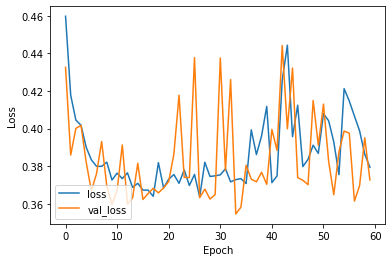

In [10]:
pyplot.plot(history.history['loss'], label = 'loss')
pyplot.plot(history.history['val_loss'], label = 'val_loss')
pyplot.xlabel('Epoch')
pyplot.ylabel('Loss')
pyplot.legend(loc='lower left')

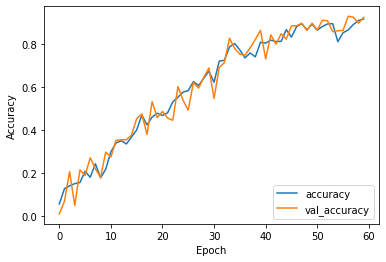

In [11]:
pyplot.plot(history.history['accuracy'], label = 'accuracy')
pyplot.plot(history.history['val_accuracy'], label = 'val_accuracy')
pyplot.xlabel('Epoch')
pyplot.ylabel('Accuracy')
pyplot.legend(loc='lower right')

In [12]:
model.save("airplanes_categorical.h5")